In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np, matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Reading and Understanding the Data

## 1.1 Reading the data in "loan.csv"

In [3]:
#read the data of "loan" in loan_data.
loan_data = pd.read_csv('loan.csv')
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Data Understanding

In [4]:
#code for inspection
loan_data.shape

(39717, 111)

In [5]:
#print information of the columns
loan_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [6]:
#checking for numeric variables for all columns
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


From above mentioned description, it is clear that there are some columns in the data only with missing values which cannot help in analysis

# 2. Data Cleaning

## 2.1 Remove/Impute the missing values

In [7]:
#checking for null values column wise
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#percentage of null values column wise
round(loan_data.isnull().sum()/loan_data.shape[0]*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

according to aforementioned data, some columns have 100% null values so, its best to remove them as they would be useless for analysis

In [9]:
#removing the columns having more than 90% of null values
loan_data=loan_data.loc[:, (loan_data.isnull().sum()/loan_data.shape[0]*100)<90]
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
# checking for null values column wise again
round(loan_data.isnull().sum()/loan_data.shape[0]*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

there are still  two columns left containing more than 15% of missing values

In [11]:
# removing the columns containing more than 15% null values
loan_data=loan_data.loc[:, (loan_data.isnull().sum()/loan_data.shape[0]*100)<15]
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## 2.2 Drop the unnecessary columns

####  the following column variables cannot be used in prediction of credit approval, so have to be removed
["title", "url", "zip_code", "addr_state", "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type","initial_list_status",	"collections_12_mths_ex_med", "policy_code", "acc_now_delinq",	"chargeoff_within_12_mths",	"delinq_amnt","pymnt_plan", "tax_liens"]

In [12]:
#dropping the above mentioned columns
loan_data.drop(
  ["title", "url", "zip_code", "addr_state",
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type","initial_list_status",
   "collections_12_mths_ex_med", "policy_code", 
   "acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pymnt_plan", "tax_liens"], axis=1, inplace=True)

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0


## 2.3 Drop unnecessary rows

In [13]:
# checking for null values row wise
loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    1
39713    1
39714    2
39715    2
39716    1
Length: 39717, dtype: int64

In [14]:
# Checking for rows having more than 5 null values
loan_data[loan_data.isnull().sum(axis=1)>5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies


according to the above mentioned output, the null values are in limits row wise

# 3. Fixing Rows and Columns

## 3.1 Fixing data types

In [15]:
# checking the datatypes of the columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

**the columns "int_rate" and "term" have object data type, they have to be converted to numeric data type for analysis**

In [16]:
# changing the data type of column "int_rate" from object to float
loan_data.int_rate = loan_data.int_rate.apply(lambda x: x[:-1])
loan_data.int_rate = loan_data.int_rate.astype("float64")
loan_data.int_rate.dtype

dtype('float64')

In [17]:
# changing the data type of column "term" from object to int
loan_data.term = loan_data.term.apply(lambda x: int(x.split( )[0]))
loan_data.term.dtype

dtype('int64')

**extract the month and year from the issue date of the loan**

In [18]:
# create "month" and "year" columns from the column variable issue_d 
loan_data['issue_mnth'] = loan_data.issue_d.apply(lambda x: x.split('-')[0])

loan_data['issue_yr'] = loan_data.issue_d.apply(lambda x: int(x.split('-')[1])+2000)

#drop the column "issue_d"
loan_data.drop("issue_d", axis=1, inplace=True)

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec_bankruptcies,issue_mnth,issue_yr
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0.0,Dec,2011


# 4. Data Analysis

In [19]:
# checking for the numerical and categorical variables
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  int64  
 6   int_rate              39717 non-null  float64
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  loan_status        

#### the "loan status" is mainly the targeted variable as it contains the records of the consumers who have defualted their loans or not

In [20]:
# percentage of each category in loan status
loan_data.loan_status.value_counts(normalize=True)

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

**the "current" category cannot help in analysis as they have neither defaulted nor fully paid**

In [21]:
# remove the rows of "current" category
loan_data=loan_data[loan_data.loan_status!='Current']
loan_data.loan_status.value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

## 4.1 Univariate analysis

### 4.1.1 Numerical Variables

#### loan amount

In [22]:
# describing the loan amount variable
loan_data.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

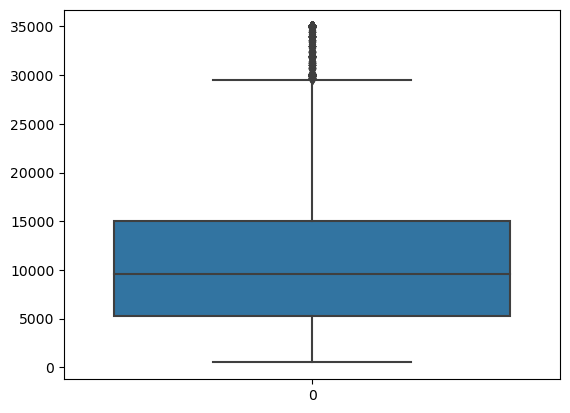

In [23]:
#plot boxplot for the loan amount ariable 
sns.boxplot(loan_data.loan_amnt)
plt.show()

#### annual income

In [24]:
# describing the annual income variable
loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

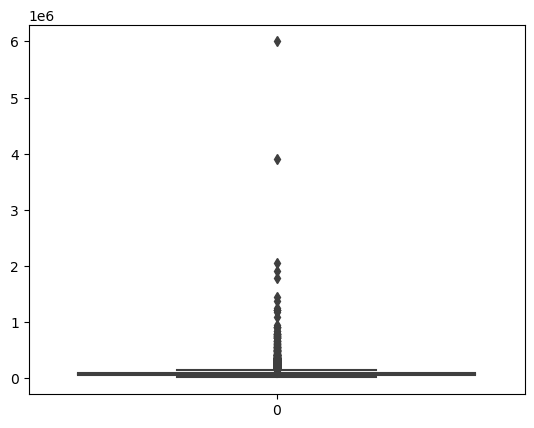

In [25]:
# plot boxplot for the annual income variable
sns.boxplot(loan_data.annual_inc)
plt.show()

#### interest rate

In [26]:
# describing the interest rate variable
loan_data.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

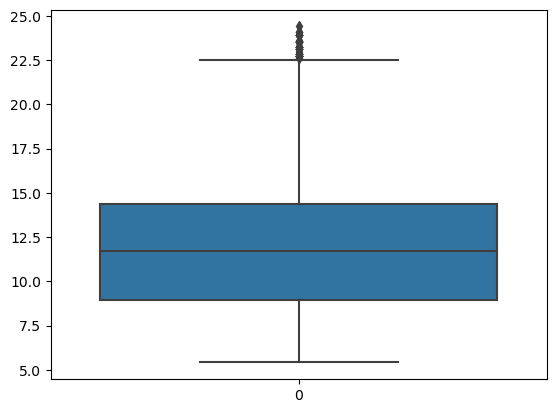

In [27]:
#boxplot for interest rate
sns.boxplot(loan_data.int_rate)
plt.show()

#### funded amount

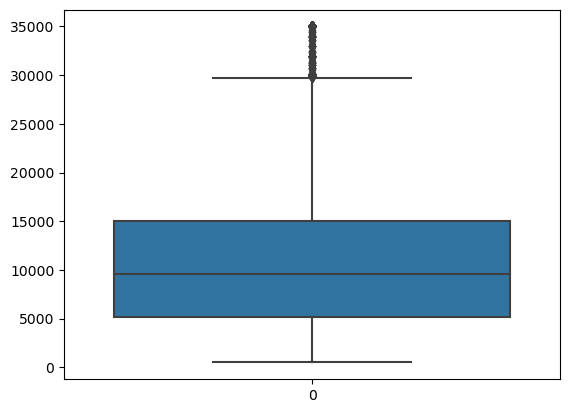

In [28]:
# plot boxplot for the funded amount variable
sns.boxplot(loan_data.funded_amnt)
plt.show()

#### funded amount invested

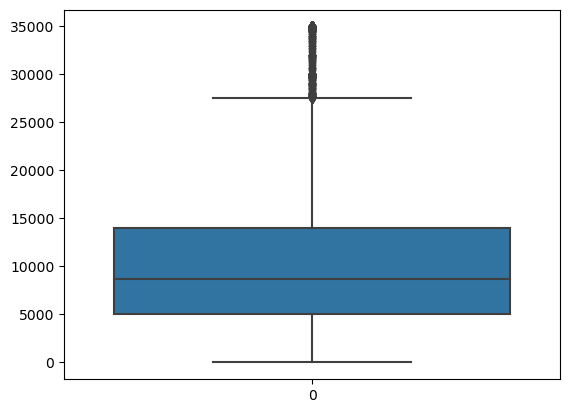

In [29]:
# plot boxplot for the funded amount invested variable
sns.boxplot(loan_data.funded_amnt_inv)
plt.show()

#### installment

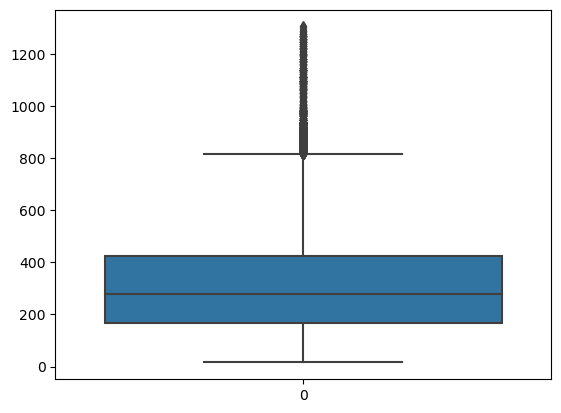

In [30]:
##boxplot for installment
sns.boxplot(loan_data.installment)
plt.show()

#### debt to income ratio

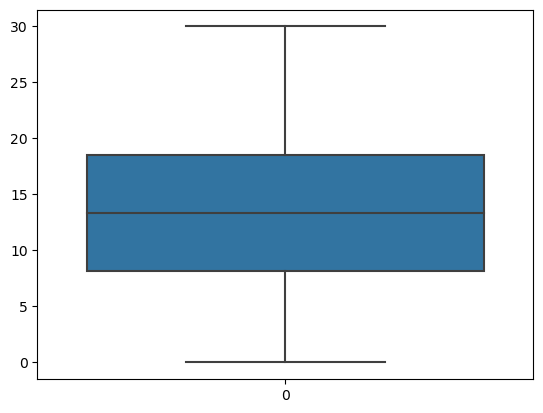

In [31]:
#boxplot for dti 
sns.boxplot(loan_data.dti)
plt.show()

### 4.1.2 Categorical Variables

#### loan status

In [32]:
# percentage of each category in loan status
loan_data.loan_status.value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

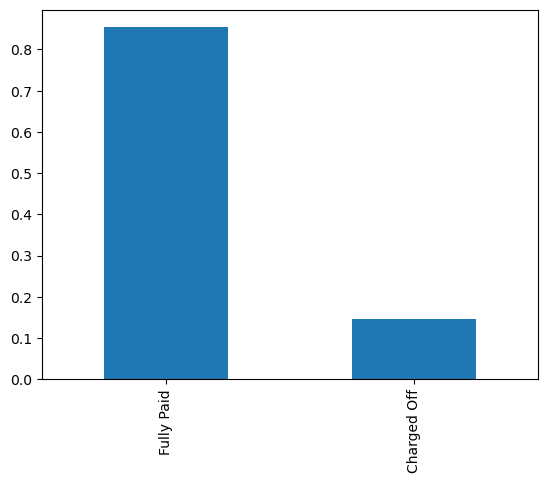

In [33]:
# boxplot for the loan status variable
loan_data.loan_status.value_counts(normalize=True).plot.bar()
plt.show()

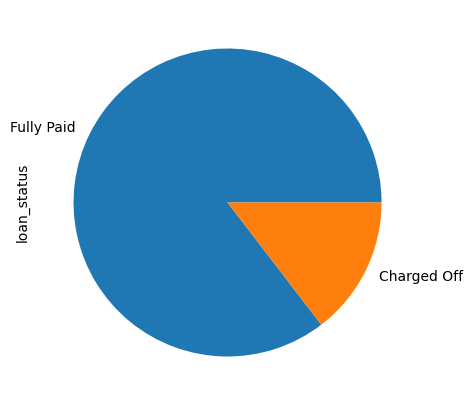

In [34]:
# pie plot for the loan status variable
plt.figure(figsize=[8,5])
loan_data.loan_status.value_counts(normalize=True).plot.pie()
plt.show()

#### Grade

In [35]:
# percentage of each category in grade of loans
loan_data.grade.value_counts(normalize=True)

B    0.302641
A    0.260388
C    0.203074
D    0.131814
E    0.069031
F    0.025300
G    0.007751
Name: grade, dtype: float64

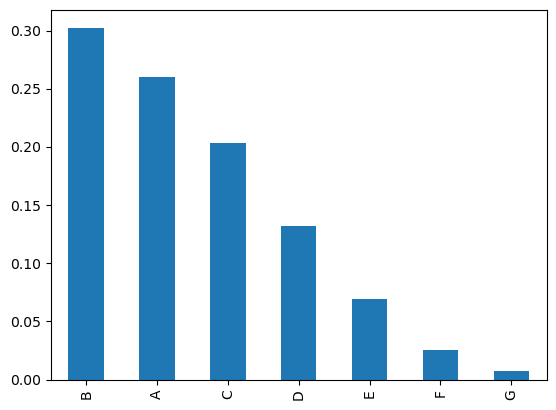

In [36]:
# bar plot for grade of loans
loan_data.grade.value_counts(normalize=True).plot.bar()
plt.show()

#### sub grade

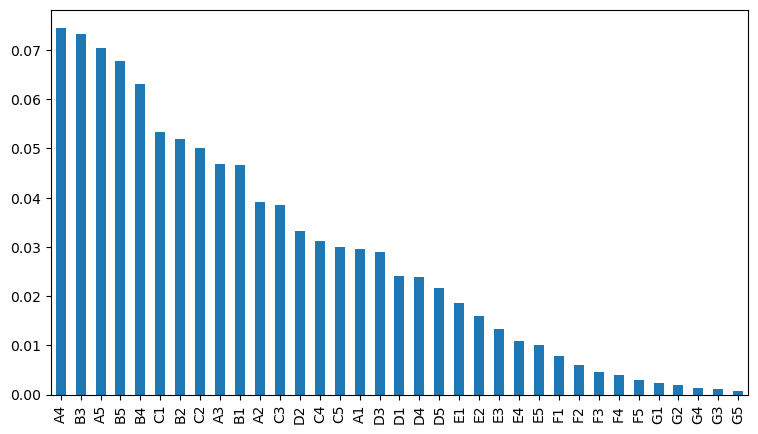

In [37]:
#barplot of each sub loan grades
plt.figure(figsize=[9,5])
loan_data.sub_grade.value_counts(normalize=True).plot.bar()
plt.show()

#### verification status

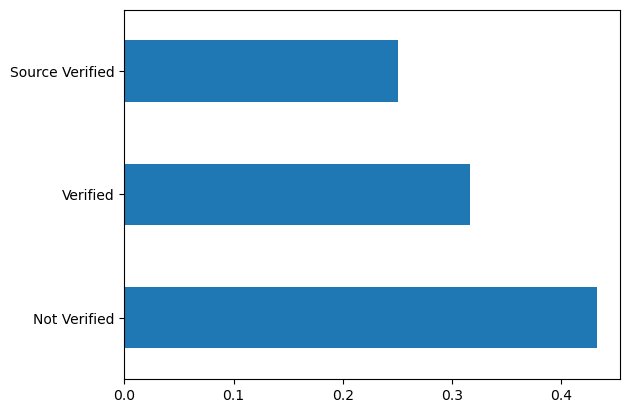

In [38]:
# barplot for verification status
loan_data.verification_status.value_counts(normalize=True).plot.barh()
plt.show()

#### home ownership

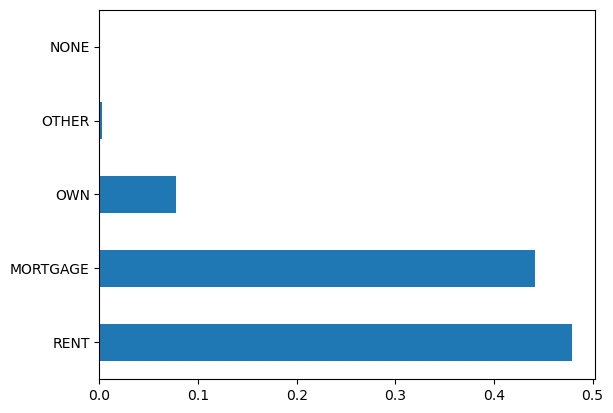

In [39]:
#barplot for home ownership status
loan_data.home_ownership.value_counts(normalize=True).plot.barh()
plt.show()

#### public record bankruptcies

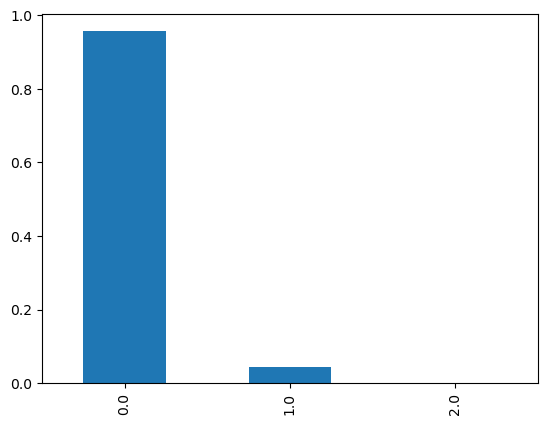

In [40]:
#barpot for no.of public record bankruptcies
loan_data.pub_rec_bankruptcies.value_counts(normalize=True).plot.bar()
plt.show()

#### term of the loans

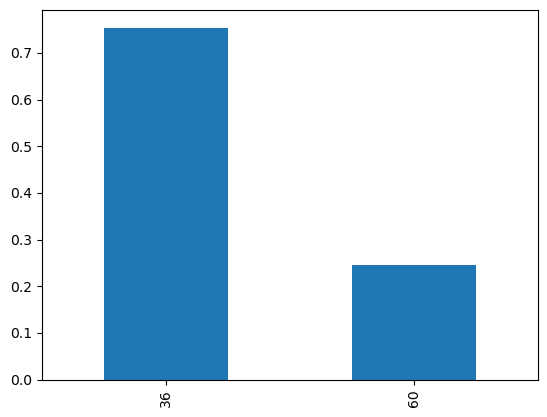

In [41]:
# bar plot for the term of the loans
loan_data.term.value_counts(normalize=True).plot.bar()
plt.show()

#### purpose of loans given by borrower

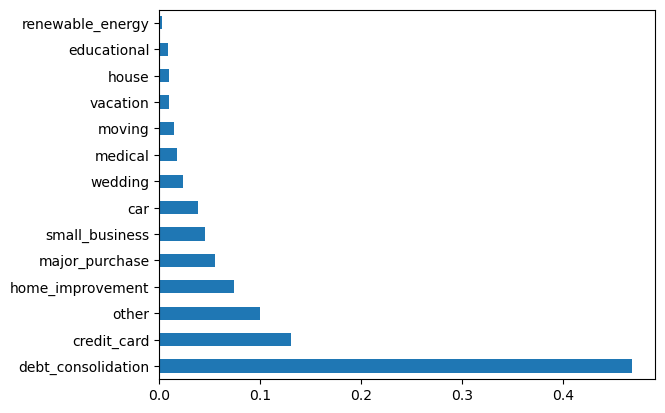

In [42]:
# bar plot for the purpose of the loan
loan_data.purpose.value_counts(normalize=True).plot.barh()
plt.show()

#### employment title

In [43]:
loan_data.emp_title.value_counts(normalize=True)

US Army                                     0.003620
Bank of America                             0.002957
IBM                                         0.001796
AT&T                                        0.001575
Kaiser Permanente                           0.001547
                                              ...   
amneal pharmaceuticals                      0.000028
Net Equity Financial                        0.000028
Kernersville Fire Department                0.000028
The Keith Corp. (empl by county, now Kei    0.000028
Evergreen Center                            0.000028
Name: emp_title, Length: 28027, dtype: float64

#### employment length

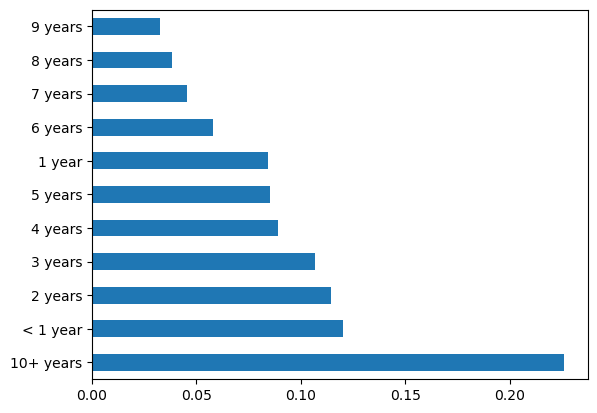

In [44]:
# boxplot for the employment length
loan_data.emp_length.value_counts(normalize=True).plot.barh()
plt.show()

#### issue month 

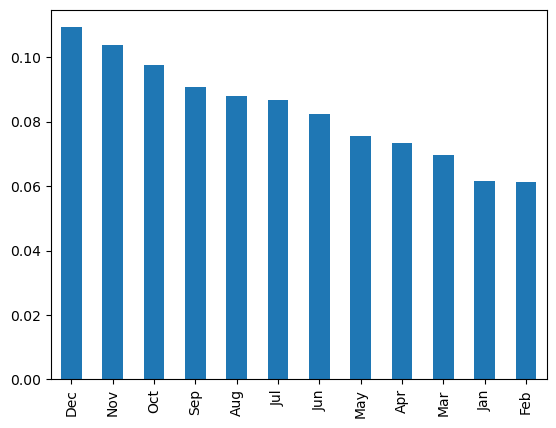

In [45]:
#boxplot for issue_mnth
loan_data.issue_mnth.value_counts(normalize=True).plot.bar()
plt.show()

#### issue year

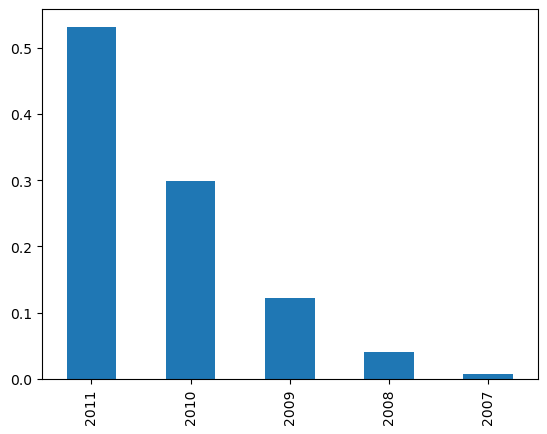

In [46]:
#boxplot for issue_yr
loan_data.issue_yr.value_counts(normalize=True).plot.bar()
plt.show()

## 4.2 Bivariate Analysis

### 4.2.1 Numeric-Numeric analysis

#### loan amount vs annual income

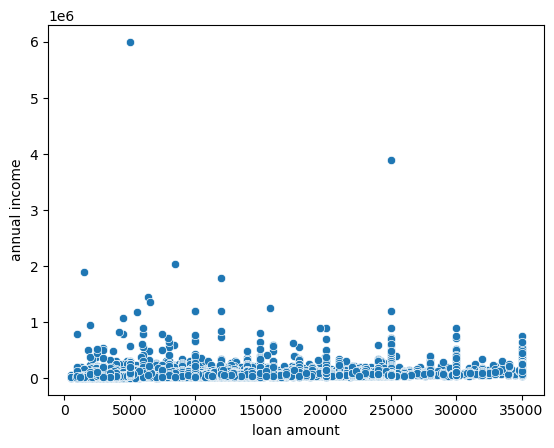

In [47]:
# scatter plot of loan amount and annual income in loan_data
sns.scatterplot(data=loan_data,x='loan_amnt',y='annual_inc')
plt.xlabel("loan amount"); plt.ylabel("annual income");
plt.show()

#### loan amount vs interest rate

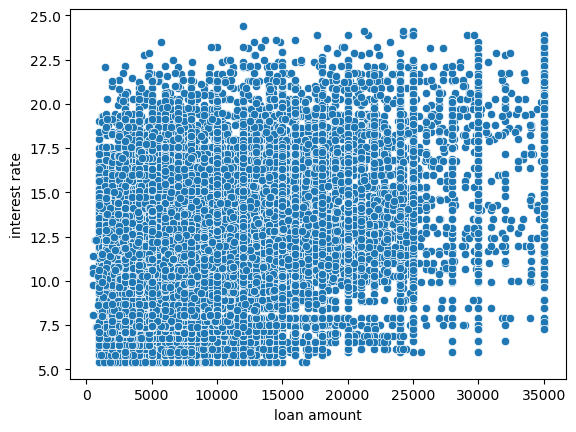

In [48]:
# scatter plot of loan amount and interest rate in loan_data
sns.scatterplot(data=loan_data,x='loan_amnt',y='int_rate')
plt.xlabel("loan amount");plt.ylabel("interest rate")
plt.show()

#### annual income vs interest rate

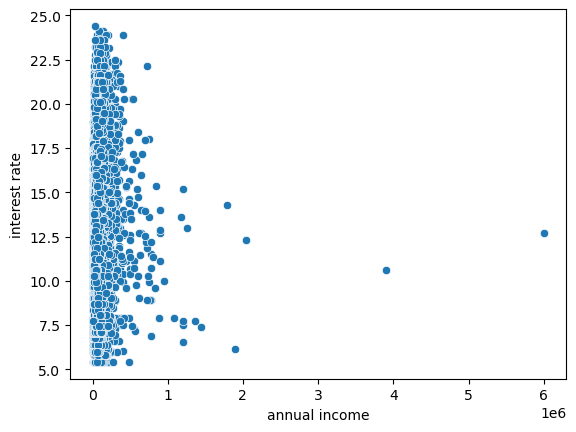

In [49]:
# scatter plot of annual income and interest rate in loan_data
sns.scatterplot(data=loan_data,x='annual_inc',y='int_rate')
plt.xlabel("annual income");plt.ylabel("interest rate")
plt.show()

#### loan amount vs installment

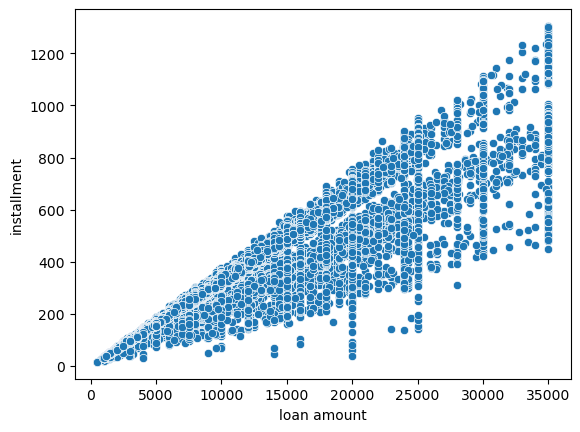

In [50]:
# scatter plot of loan amount and installment in loan_data
sns.scatterplot(data=loan_data, x='loan_amnt', y='installment')
plt.xlabel("loan amount");plt.ylabel("installment")
plt.show()

#### annual income vs installment

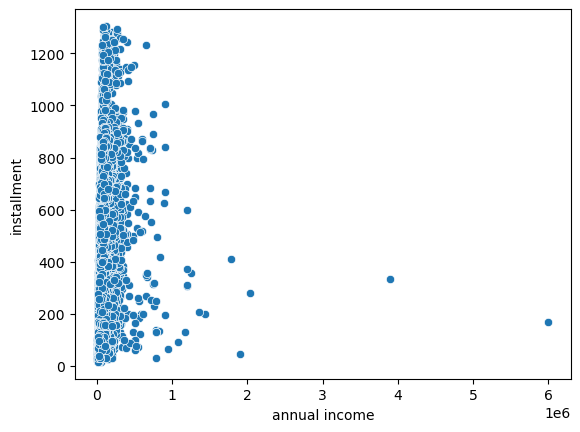

In [51]:
# scatter plot of annual income and installment in loan_data
sns.scatterplot(data=loan_data, x='annual_inc', y='installment')
plt.xlabel("annual income");plt.ylabel("installment")
plt.show()

#### loan amount vs debt to income ratio

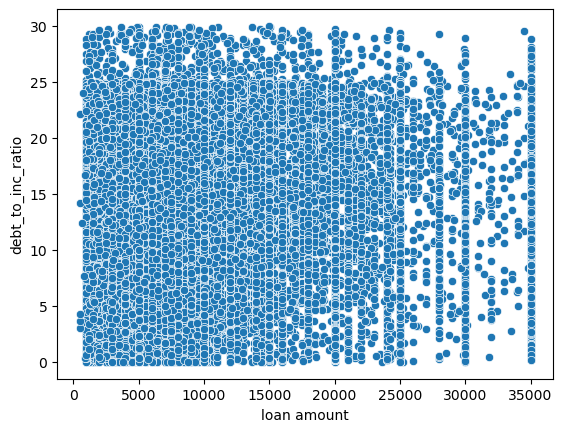

In [52]:
# scatter plot of loan amount and debt to income ratio in loan_data
sns.scatterplot(data=loan_data, x='loan_amnt', y='dti')
plt.xlabel("loan amount");plt.ylabel("debt_to_inc_ratio")
plt.show()

#### annual income vs debt to income ratio

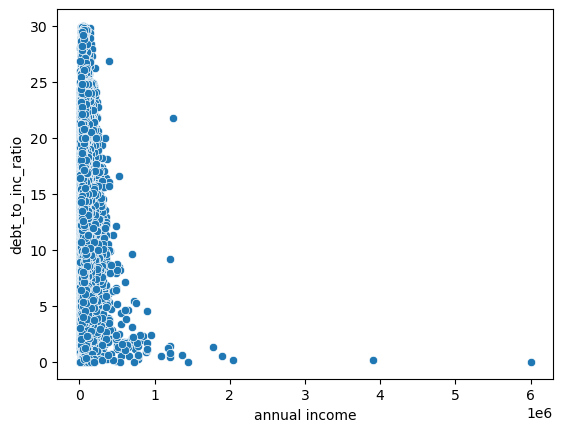

In [53]:
# scatter plot of annual income and debt to income ratio in loan_data
sns.scatterplot(data=loan_data, x='annual_inc', y='dti')
plt.xlabel("annual income");plt.ylabel("debt_to_inc_ratio")
plt.show()

#### loan amount vs funded amount

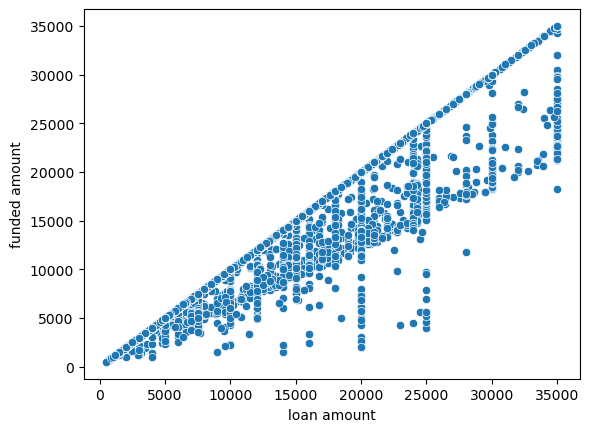

In [54]:
# scatter plot of loan amount and funded amount in loan_data
sns.scatterplot(data=loan_data, x='loan_amnt', y='funded_amnt')
plt.xlabel("loan amount");plt.ylabel("funded amount")
plt.show()

#### funded amount vs funded amount invested

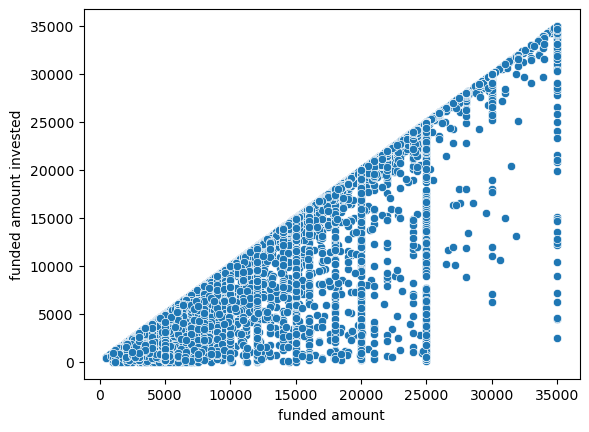

In [55]:
# scatter plot of funded amount and funded amount invested in loan_data
sns.scatterplot(data=loan_data, x='funded_amnt', y='funded_amnt_inv')
plt.xlabel("funded amount"); plt.ylabel("funded amount invested")
plt.show()

#### pair plot, correlation matrix and heatmap of loan amount, annual income, installment and debt to income ratio

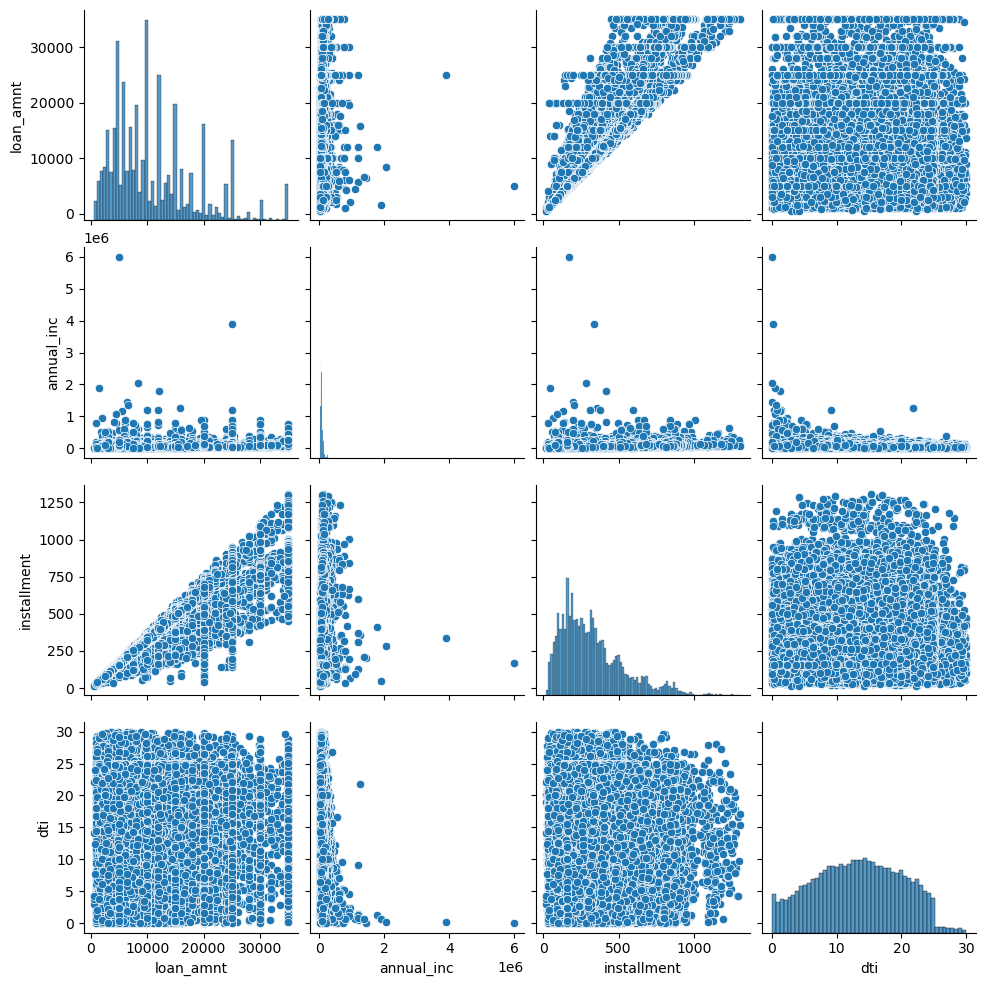

In [56]:
#pair plot of loan amount, annual income, installment and debt to income ratio
sns.pairplot(loan_data[["loan_amnt", "annual_inc", "installment", "dti"]])
plt.show()

In [57]:
# correlation matrix of loan amount, annual income, installment and debt to income ratio
loan_data[["loan_amnt", "annual_inc", "installment", "dti"]].corr()

,loan_amnt,annual_inc,installment,dti
loan_amnt,1.000000,0.268999,0.932260,0.062436
annual_inc,0.268999,1.000000,0.267842,-0.121530
installment,0.932260,0.267842,1.000000,0.052038
dti,0.062436,-0.121530,0.052038,1.000000


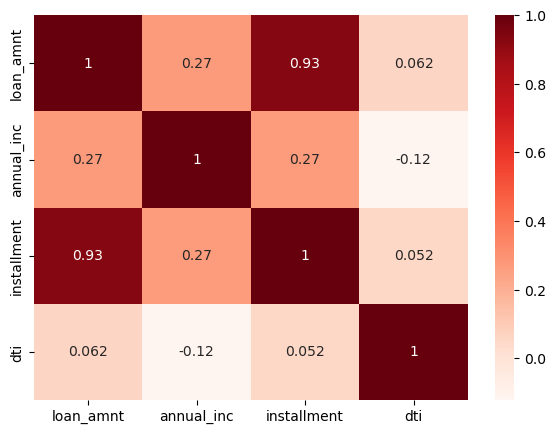

In [58]:
#heatmap of loan amount, annual income, installment and debt to income ratio
plt.figure(figsize=[7,5])
sns.heatmap(loan_data[["loan_amnt", "annual_inc", "installment", "dti"]].corr(), annot=True, cmap='Reds')
plt.show()

#### pair plot, correlation matrix and heatmap of loan amount, interest rate, annual income and funded amount

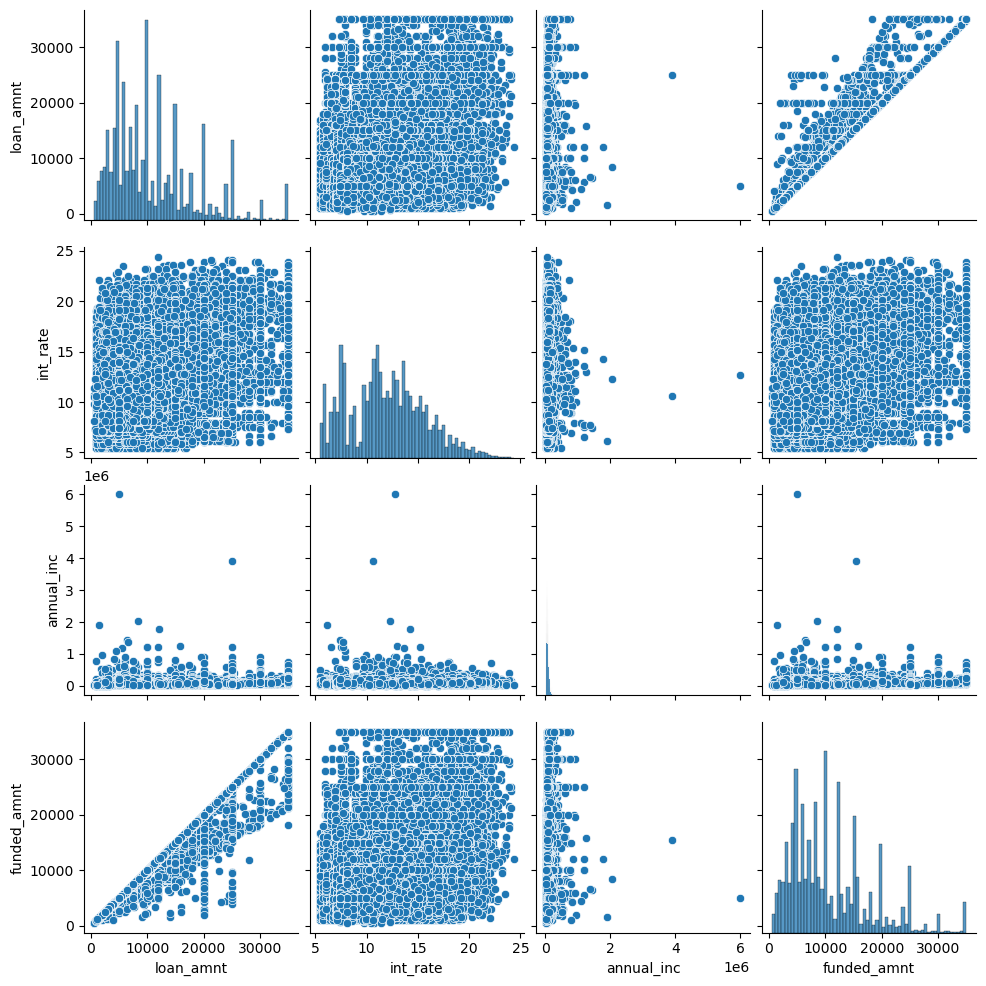

In [59]:
#pair plot of loan amount, interest rate, annual income and funded amount
sns.pairplot(loan_data[["loan_amnt", "int_rate", "annual_inc", "funded_amnt"]])
plt.show()

In [60]:
# correlation matrix loan amount, interest rate, annual income and funded amount
loan_data[["loan_amnt", "int_rate", "annual_inc", "funded_amnt"]].corr()

,loan_amnt,int_rate,annual_inc,funded_amnt
loan_amnt,1.000000,0.301265,0.268999,0.981790
int_rate,0.301265,1.000000,0.048899,0.304930
annual_inc,0.268999,0.048899,1.000000,0.264798
funded_amnt,0.981790,0.304930,0.264798,1.000000


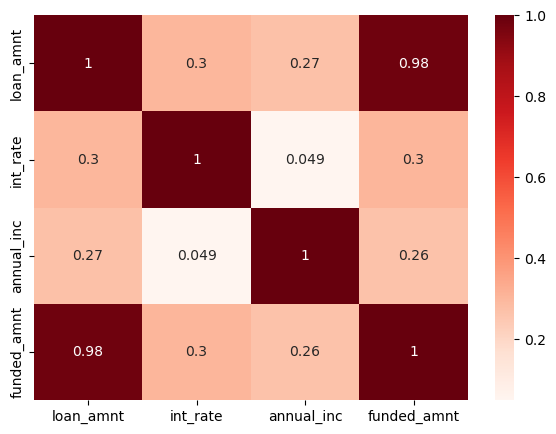

In [61]:
#plotting heatmap of loan amount, interest rate, annual income and funded amount
plt.figure(figsize=[7,5])
sns.heatmap(loan_data[["loan_amnt", "int_rate", "annual_inc", "funded_amnt"]].corr(), annot=True, cmap='Reds')
plt.show()

### 4.2.2 Numerical-categorical analysis

#### loan status v/s loan amount

In [62]:
loan_data.groupby('loan_status').loan_amnt.mean()

loan_status
Charged Off    12104.385108
Fully Paid     10866.455994
Name: loan_amnt, dtype: float64

In [63]:
loan_data.groupby('loan_status').loan_amnt.median()

loan_status
Charged Off    10000.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64

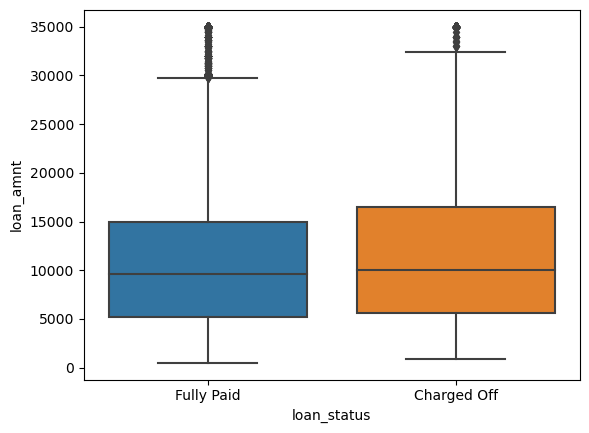

In [64]:
sns.boxplot(data=loan_data, x='loan_status', y='loan_amnt')
plt.show()

#### annual income v/s loan status

In [65]:
loan_data.groupby('loan_status').annual_inc.mean()

loan_status
Charged Off    62427.298034
Fully Paid     69862.503328
Name: annual_inc, dtype: float64

In [66]:
loan_data.groupby('loan_status').annual_inc.median()

loan_status
Charged Off    53000.0
Fully Paid     60000.0
Name: annual_inc, dtype: float64

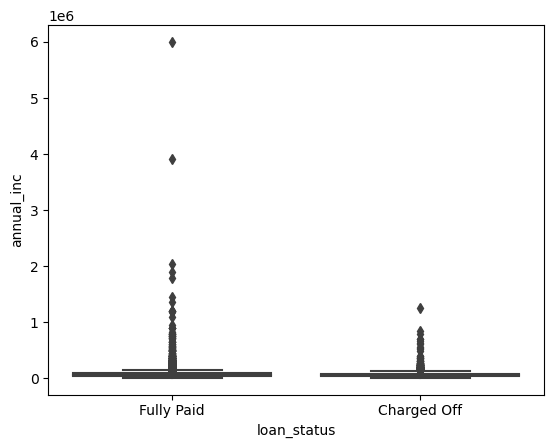

In [67]:
sns.boxplot(data=loan_data, x='loan_status', y='annual_inc')
plt.show()

In [68]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

#calculate the mean, median and 75th percentile of annual income with loan status
loan_data.groupby('loan_status').annual_inc.aggregate(['mean','median',p75])

,mean,median,p75
loan_status,,,
Charged Off,62427.298034,53000.0,75000.0
Fully Paid,69862.503328,60000.0,84000.0


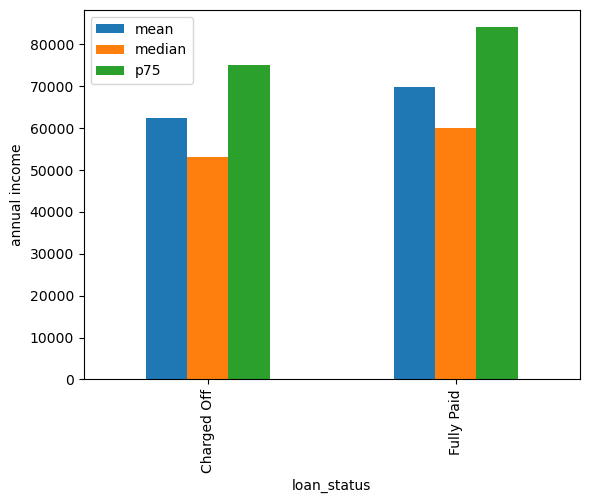

In [69]:
# plotting bar graph of annual incomes's mean, median, 75th quantile with loan status
loan_data.groupby('loan_status').annual_inc.aggregate(['mean','median',p75]).plot.bar()
plt.ylabel('annual income')
plt.show()

#### interest rate v/s loan_status

In [70]:
loan_data.groupby('loan_status').int_rate.mean()

loan_status
Charged Off    13.820432
Fully Paid     11.609761
Name: int_rate, dtype: float64

In [71]:
loan_data.groupby('loan_status').int_rate.median()

loan_status
Charged Off    13.61
Fully Paid     11.49
Name: int_rate, dtype: float64

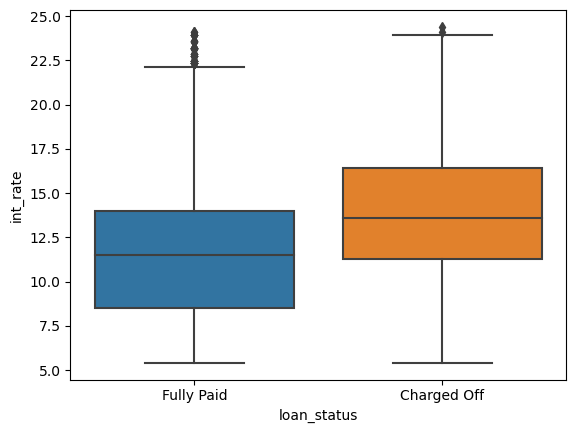

In [72]:
sns.boxplot(data=loan_data, x='loan_status', y='int_rate')
plt.show()

#### purpose vs annual income

In [73]:
#groupby the purpose for loans to find the mean of the annual income for each employment category.
loan_data.groupby('purpose').annual_inc.mean()

purpose
car                   61968.900294
credit_card           70329.557048
debt_consolidation    67078.554784
educational           53471.374092
home_improvement      89497.252675
house                 76757.602616
major_purchase        66501.616926
medical               67497.793877
moving                61975.804080
other                 62834.737092
renewable_energy      77181.084608
small_business        75227.858444
vacation              59126.436400
wedding               68423.690119
Name: annual_inc, dtype: float64

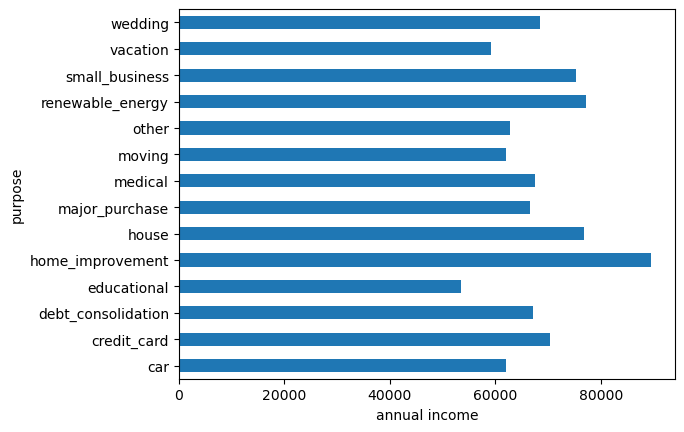

In [74]:
#plot bar graph of purpose with annual income
loan_data.groupby('purpose').annual_inc.mean().plot.barh()
plt.xlabel('annual income')
plt.show()

#### employment v/s annual income

In [75]:
#groupby the employment title to find the mean of the annual income for each employment category.
loan_data.groupby('emp_title').annual_inc.mean()

emp_title
  old palm inc                        50000.0
 Brocade Communications              294000.0
 CenturyLink                          65000.0
 Department of Homeland Security      94000.0
 Down To Earth Distributors, Inc.     42000.0
                                       ...   
zashko inc.                           48000.0
zeno office solutions                 42000.0
zion lutheran school                  45600.0
zoll medical corp                     35000.0
zozaya officiating                    53004.0
Name: annual_inc, Length: 28027, dtype: float64

### 4.2.3 Categorical-Categorical analysis

**create "loan_stat_flag" variable of numerical data type for loan status where, charged off=1, fully paid=0**

In [76]:
loan_data["loan_stat_flag"]=np.where(loan_data.loan_status=='Charged Off',1,0)

In [77]:
loan_data.loan_stat_flag.value_counts(normalize=True)

0    0.854136
1    0.145864
Name: loan_stat_flag, dtype: float64

In [78]:
loan_data.loan_status.value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

In [79]:
loan_data.loan_stat_flag.mean()

0.14586411592399617

#### loan status v/s grade

In [80]:
# calculating the mean of loan_stat_flag with different grades of loans
loan_data.groupby('grade').loan_stat_flag.mean()

grade
A    0.059930
B    0.122056
C    0.171943
D    0.219862
E    0.268494
F    0.326844
G    0.337793
Name: loan_stat_flag, dtype: float64

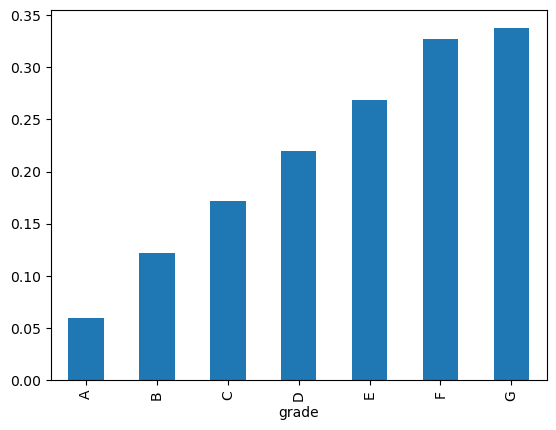

In [81]:
# bar plot of grade of loans with average value of loan_stat_flag
loan_data.groupby('grade').loan_stat_flag.mean().plot.bar()
plt.show()

#### loan status v/s sub grade

In [82]:
# calculating the mean of loan_stat_flag with different sub grades of loans
loan_data.groupby('sub_grade').loan_stat_flag.mean()

sub_grade
A1    0.026339
A2    0.049072
A3    0.056906
A4    0.061956
A5    0.079926
B1    0.095159
B2    0.113943
B3    0.120708
B4    0.135002
B5    0.136138
C1    0.163504
C2    0.166235
C3    0.181452
C4    0.175788
C5    0.180243
D1    0.179377
D2    0.210731
D3    0.229391
D4    0.234205
D5    0.250600
E1    0.274238
E2    0.265472
E3    0.230620
E4    0.297170
E5    0.281654
F1    0.298361
F2    0.300429
F3    0.293103
F4    0.350993
F5    0.477876
G1    0.329787
G2    0.363636
G3    0.422222
G4    0.240741
G5    0.344828
Name: loan_stat_flag, dtype: float64

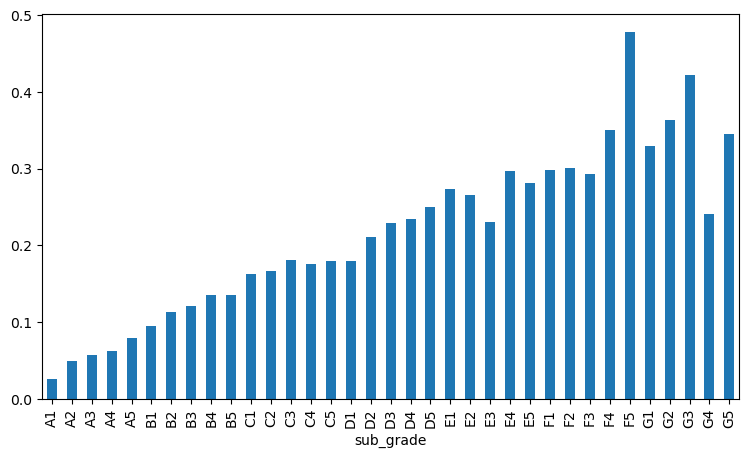

In [83]:
# bar plot of sub grade of loans with average value of loan_stat_flag
plt.figure(figsize=[9,5])
loan_data.groupby('sub_grade').loan_stat_flag.mean().plot.bar()
plt.show()

#### home ownership vs loan status

In [84]:
# calculating the mean of loan_stat_flag with different categories of home ownership
loan_data.groupby('home_ownership').loan_stat_flag.mean()

home_ownership
MORTGAGE    0.136713
NONE        0.000000
OTHER       0.183673
OWN         0.148908
RENT        0.153626
Name: loan_stat_flag, dtype: float64

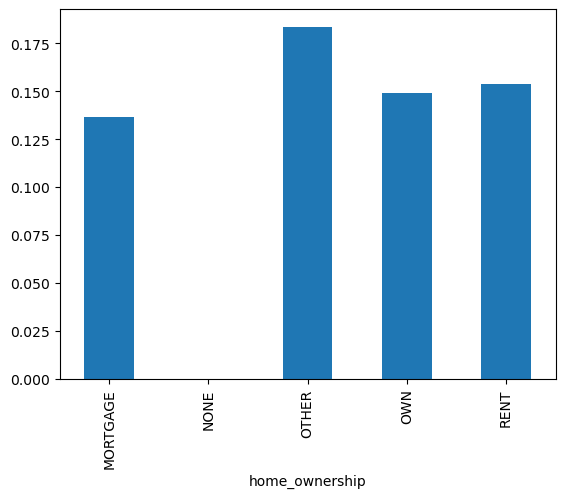

In [85]:
# bar plot of home ownership with average value of loan_stat_flag
loan_data.groupby('home_ownership').loan_stat_flag.mean().plot.bar()
plt.show()

#### purpose vs loan status

In [86]:
# calculating the mean of loan_stat_flag with different categories of purpose
loan_data.groupby('purpose').loan_stat_flag.mean()

purpose
car                   0.106738
credit_card           0.107818
debt_consolidation    0.153254
educational           0.172308
home_improvement      0.120696
house                 0.160763
major_purchase        0.103256
medical               0.155653
moving                0.159722
other                 0.163777
renewable_energy      0.186275
small_business        0.270810
vacation              0.141333
wedding               0.103672
Name: loan_stat_flag, dtype: float64

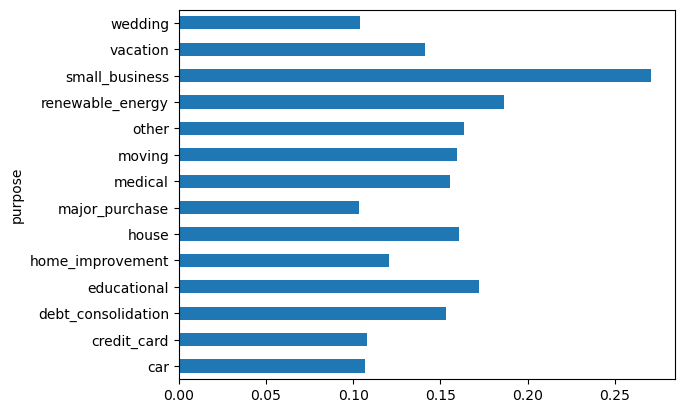

In [87]:
# bar plot of purpose with average value of loan_stat_flag
loan_data.groupby('purpose').loan_stat_flag.mean().plot.barh()
plt.show()

#### verification status of income vs loan status

In [88]:
## calculating the mean of loan_stat_flag with different categories of verification status
loan_data.groupby('verification_status').loan_stat_flag.mean()

verification_status
Not Verified       0.128310
Source Verified    0.148186
Verified           0.168032
Name: loan_stat_flag, dtype: float64

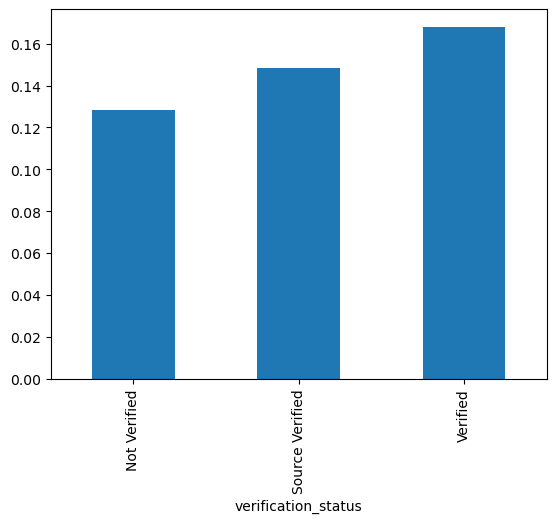

In [89]:
# bar plot of verification status with average value of loan_stat_flag
loan_data.groupby('verification_status').loan_stat_flag.mean().plot.bar()
plt.show()

#### term vs loan status

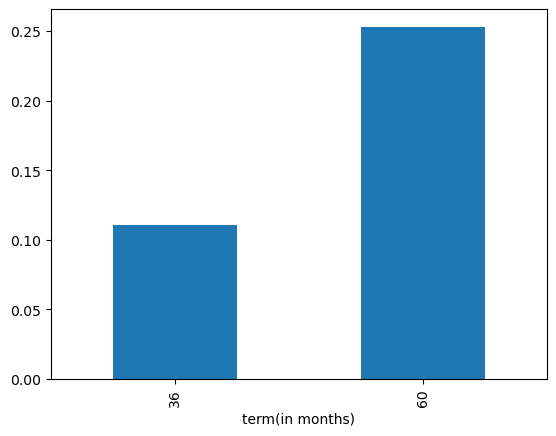

In [90]:
# bar plot of term of loans with average value of loan_stat_flag
loan_data.groupby('term').loan_stat_flag.mean().plot.bar()
plt.xlabel('term(in months)')
plt.show()

#### public record bankruptcies vs loan status

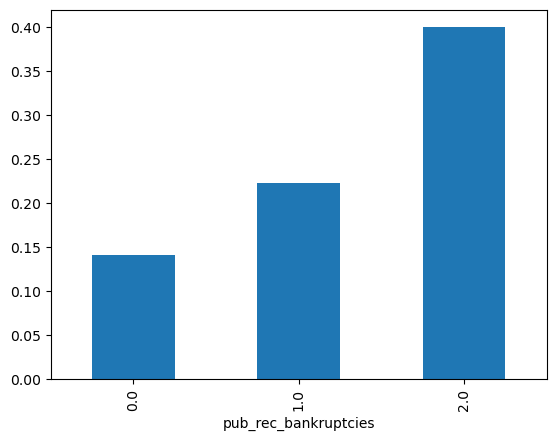

In [91]:
# bar plot of public record bankruptcies with average value of loan_stat_flag
loan_data.groupby('pub_rec_bankruptcies').loan_stat_flag.mean().plot.bar()
plt.show()

#### issue month vs loan status

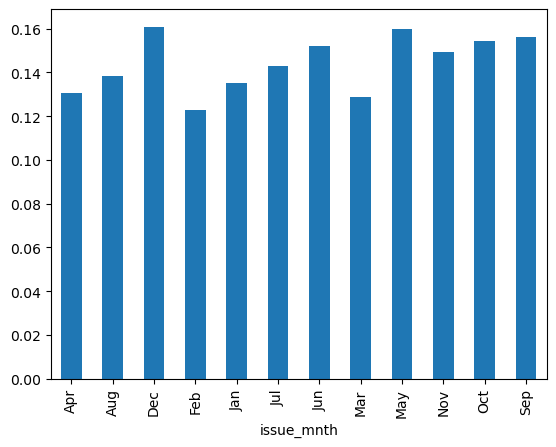

In [92]:
# bar plot of issue month with average value of loan_stat_flag
loan_data.groupby('issue_mnth').loan_stat_flag.mean().plot.bar()
plt.show()

#### issue year vs loan status

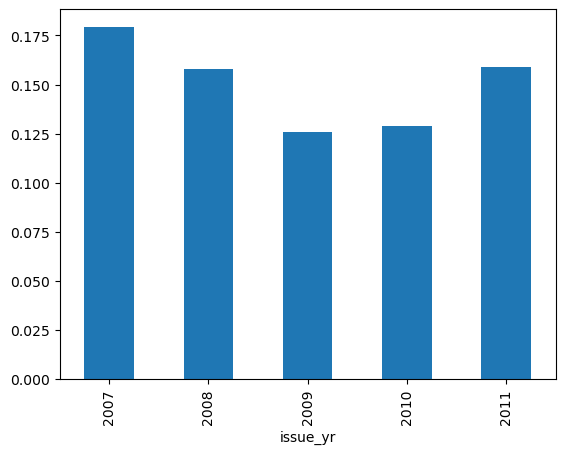

In [93]:
# bar plot of issue year with average value of loan_stat_flag
loan_data.groupby('issue_yr').loan_stat_flag.mean().plot.bar()
plt.show()

#### loan amount vs loan status

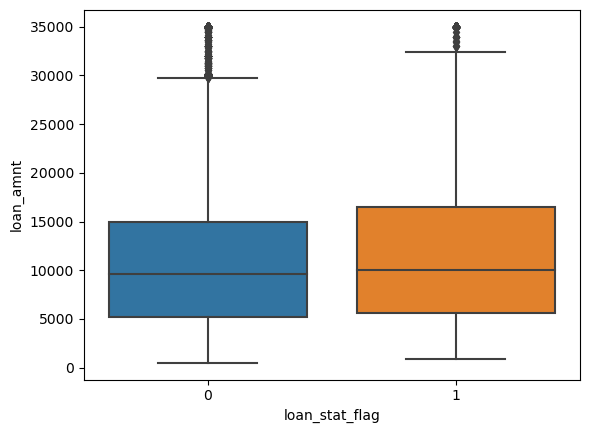

In [94]:
# boxplot of loan amount with loan_stat_flag
sns.boxplot(data=loan_data, x='loan_stat_flag', y='loan_amnt')
plt.show()

##### making buckets from loan amount columns

In [95]:
# create buckets of '<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+' from loan amount column
pd.cut(loan_data.loan_amnt, [0, 5000, 10000, 15000, 20000, 25000, 999999], 
       labels=['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+']).head()

0       <5k
1       <5k
2       <5k
3    5k-10k
5       <5k
Name: loan_amnt, dtype: category
Categories (6, object): ['<5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-25k' < '25k+']

In [96]:
# creating new column "loan_amnt_group" for the buckets of loan amount
loan_data['loan_amnt_group']=pd.cut(loan_data.loan_amnt, [0, 5000, 10000, 15000, 20000, 25000, 999999], 
       labels=['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+'])

loan_data.loan_amnt_group.head()

0       <5k
1       <5k
2       <5k
3    5k-10k
5       <5k
Name: loan_amnt_group, dtype: category
Categories (6, object): ['<5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-25k' < '25k+']

##### subplots of loan amount group and loan amount group with loan status flag variable

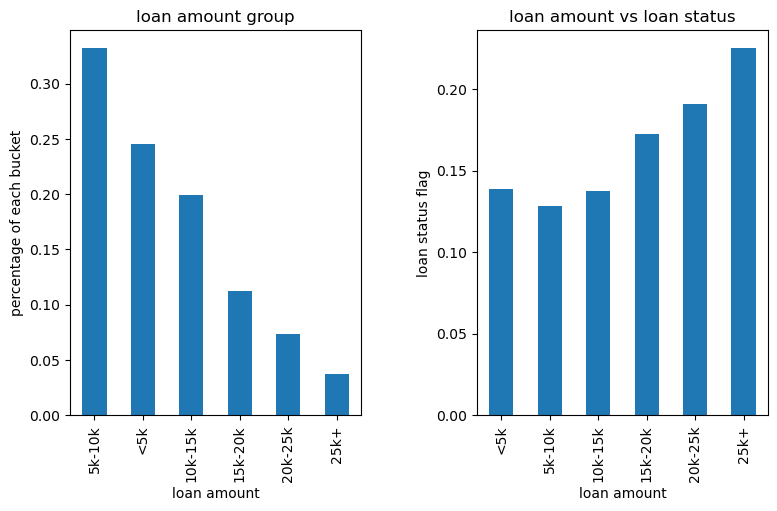

In [97]:
# plot the percentages of each bucket in loan amount group and loan amount group with
#average values of loan_stat_flag in each bucket.
#plot in subplots.

plt.figure(figsize=[9,5])
plt.subplots_adjust(wspace=.4)

#subplot 1
plt.subplot(1,2,1)

loan_data.loan_amnt_group.value_counts(normalize=True).plot.bar()
plt.title('loan amount group')
plt.xlabel('loan amount')
plt.ylabel('percentage of each bucket')


#subpolt 2
plt.subplot(1,2,2)

loan_data.groupby('loan_amnt_group').loan_stat_flag.mean().plot.bar()
plt.title('loan amount vs loan status')
plt.xlabel('loan amount')
plt.ylabel('loan status flag')

plt.show()

#### annual income vs loan status

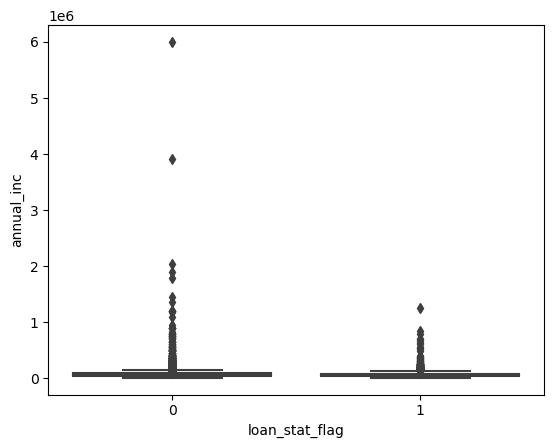

In [98]:
# boxplot of annual income with loan_stat_flag
sns.boxplot(data=loan_data, x='loan_stat_flag', y='annual_inc')
plt.show()

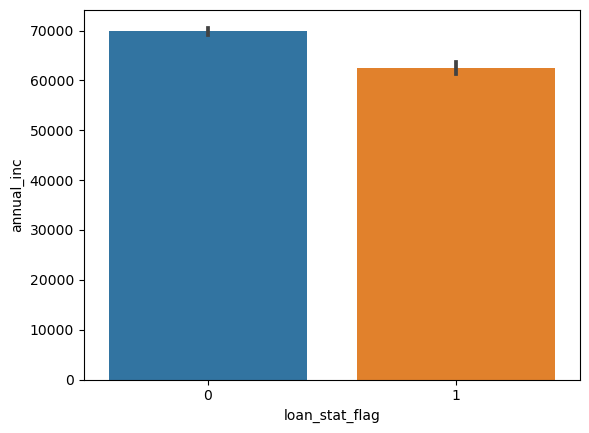

In [99]:
#barplot
sns.barplot(data=loan_data, x='loan_stat_flag', y='annual_inc')
plt.show()

##### making buckets for annual income

In [100]:
# create buckets of '<10k', '10k-30k', '30k-50k', '50k-70k', '70k+' from annual income column
pd.cut(loan_data.annual_inc, [0,10000, 30000, 50000, 70000, 9999999], 
       labels=['<10k', '10k-30k', '30k-50k', '50k-70k', '70k+']).head()

0    10k-30k
1    10k-30k
2    10k-30k
3    30k-50k
5    30k-50k
Name: annual_inc, dtype: category
Categories (5, object): ['<10k' < '10k-30k' < '30k-50k' < '50k-70k' < '70k+']

In [101]:
# creating new column 'ann_inc_group' for above buckets of annual income
loan_data['ann_inc_group']=pd.cut(loan_data.annual_inc, [0,10000, 30000, 50000, 70000, 9999999], 
       labels=['<10k', '10k-30k', '30k-50k', '50k-70k', '70k+'])

loan_data.ann_inc_group.head()

0    10k-30k
1    10k-30k
2    10k-30k
3    30k-50k
5    30k-50k
Name: ann_inc_group, dtype: category
Categories (5, object): ['<10k' < '10k-30k' < '30k-50k' < '50k-70k' < '70k+']

##### subplots of annual income group and annual income group with loan status flag variable

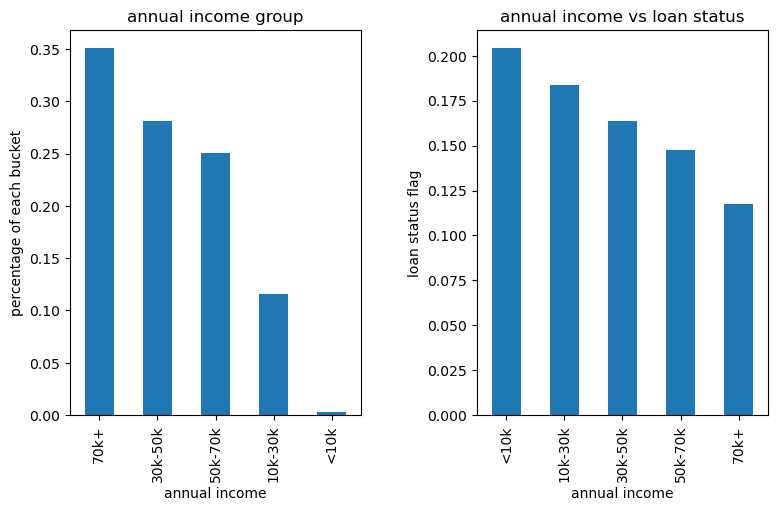

In [102]:
# plot the percentages of each bucket in annual income group and annual income group with
#average values of loan_stat_flag in each bucket.
#plot in subplots.

plt.figure(figsize=[9,5])
plt.subplots_adjust(wspace=.4)

#subplot 1
plt.subplot(1,2,1)

loan_data.ann_inc_group.value_counts(normalize=True).plot.bar()
plt.title('annual income group')
plt.xlabel('annual income')
plt.ylabel('percentage of each bucket')


#subplot 2
plt.subplot(1,2,2)

loan_data.groupby('ann_inc_group').loan_stat_flag.mean().plot.bar()
plt.title('annual income vs loan status')
plt.xlabel('annual income')
plt.ylabel('loan status flag')

plt.show()

#### interest rate vs loan status

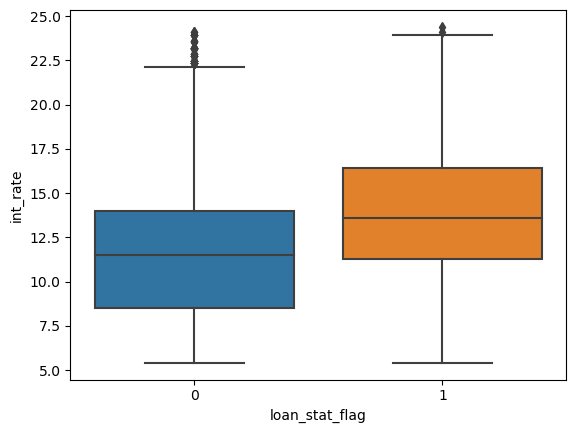

In [103]:
# boxplot of interest rate with loan_stat_flag
sns.boxplot(data=loan_data, x='loan_stat_flag', y='int_rate')
plt.show()

##### making buckets for interest rate

In [104]:
# create buckets of 'very low', 'low', 'medium', 'high', 'very high' from interest rate
pd.cut(loan_data.int_rate, [0, 5, 10, 15, 20, 99], 
                                   labels=['very low', 'low', 'medium', 'high', 'very high']).head()

0    medium
1      high
2      high
3    medium
5       low
Name: int_rate, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

In [105]:
# creating a new variable "int_rate_group" for the above buckets of interest rate
loan_data['int_rate_group']=pd.cut(loan_data.int_rate, [0, 5, 10, 15, 20, 99], 
                                   labels=['very low', 'low', 'medium', 'high', 'very high'])

loan_data.int_rate_group.head()

0    medium
1      high
2      high
3    medium
5       low
Name: int_rate_group, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

##### subplots of interest rate group and interest rate group with loan status flag variable

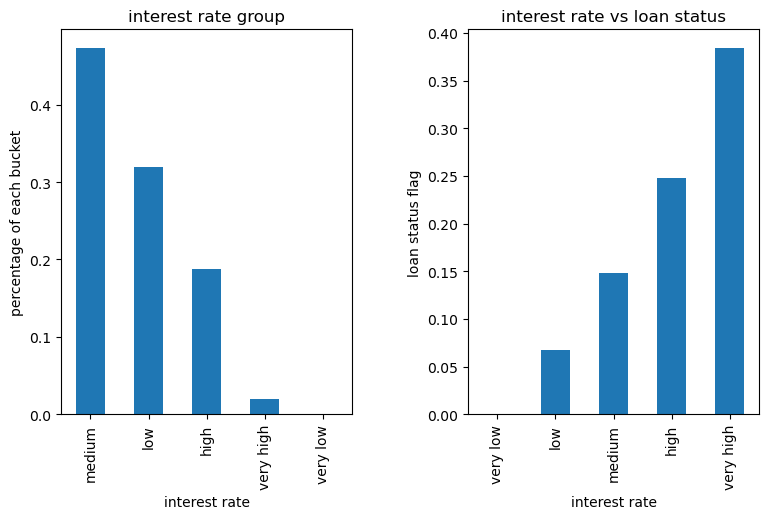

In [106]:
# plot the percentages of each bucket in interest rate group and interest rate group with 
# average values of loan_stat_flag in each bucket.
#plot in subplots.

plt.figure(figsize=[9,5])
plt.subplots_adjust(wspace=.4)

#subplot 1
plt.subplot(1,2,1)

loan_data.int_rate_group.value_counts(normalize=True).plot.bar()
plt.title('interest rate group')
plt.xlabel('interest rate')
plt.ylabel('percentage of each bucket')


#subplot 2
plt.subplot(1,2,2)

loan_data.groupby('int_rate_group').loan_stat_flag.mean().plot.bar()
plt.title('interest rate vs loan status')
plt.xlabel('interest rate')
plt.ylabel('loan status flag')

plt.show()

#### installment vs loan status

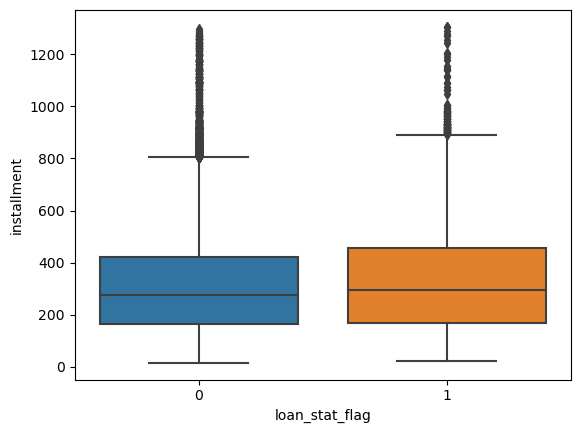

In [107]:
# boxplot of installment with loan_stat_flag
sns.boxplot(data=loan_data, x='loan_stat_flag', y='installment')
plt.show()

In [108]:
# create buckets of 'very low', 'low', 'medium', 'high', 'very high' from installment
pd.cut(loan_data.installment, [0, 150, 250, 350, 450, 9999], 
                                   labels=['very low', 'low', 'medium', 'high', 'very high']).head()

0         low
1    very low
2    very low
3      medium
5         low
Name: installment, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

In [109]:
# creating a new variable "installment_grp" for the above buckets of installment
loan_data['installment_grp']=pd.cut(loan_data.installment, [0, 150, 250, 350, 450, 9999], 
                                   labels=['very low', 'low', 'medium', 'high', 'very high'])

loan_data.installment_grp.head()

0         low
1    very low
2    very low
3      medium
5         low
Name: installment_grp, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

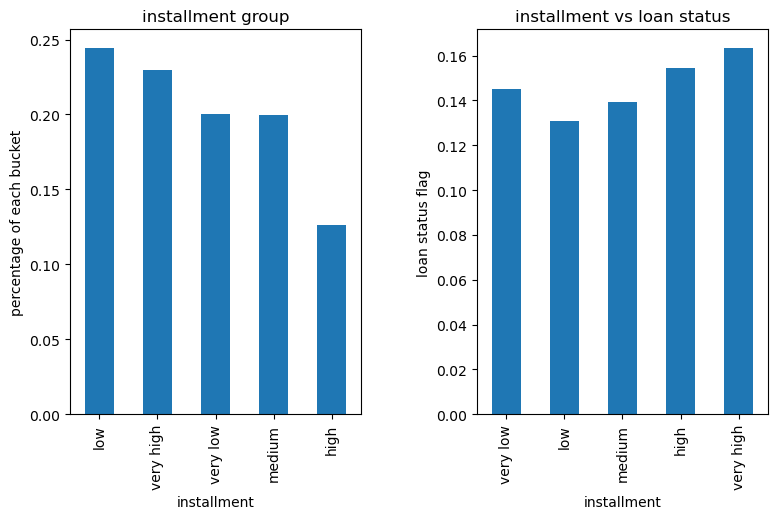

In [110]:
# plot the percentages of each bucket in installment group and installment group with
#average values of loan_stat_flag in each bucket.
#plot in subplots.

plt.figure(figsize=[9,5])
plt.subplots_adjust(wspace=.4)

#subplot 1
plt.subplot(1,2,1)

loan_data.installment_grp.value_counts(normalize=True).plot.bar()
plt.title('installment group')
plt.xlabel('installment')
plt.ylabel('percentage of each bucket')


#subplot 2
plt.subplot(1,2,2)

loan_data.groupby('installment_grp').loan_stat_flag.mean().plot.bar()
plt.title('installment vs loan status')
plt.xlabel('installment')
plt.ylabel('loan status flag')

plt.show()

#### debt to income ratio vs loan status

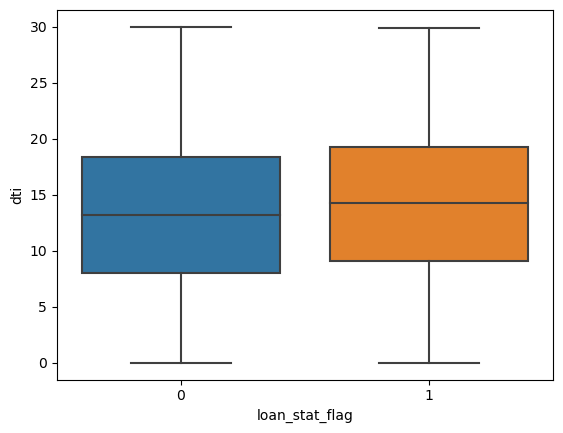

In [111]:
# boxplot of debt to income ratio with loan_stat_flag
sns.boxplot(data=loan_data, x='loan_stat_flag', y='dti')
plt.show()

In [112]:
# create buckets of 'low', 'medium', 'high', 'very high' from dti
pd.cut(loan_data.dti, [0, 10, 15, 20, 99], 
                                   labels=['low', 'medium', 'high', 'very high']).head()

0    very high
1          low
2          low
3         high
5       medium
Name: dti, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

In [113]:
# creating a new variable "dti_grp" for the above buckets of dti
loan_data['dti_grp']=pd.cut(loan_data.dti, [0, 10, 15, 20, 99], 
                                   labels=['low', 'medium', 'high', 'very high'])

loan_data.dti_grp.head()

0    very high
1          low
2          low
3         high
5       medium
Name: dti_grp, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

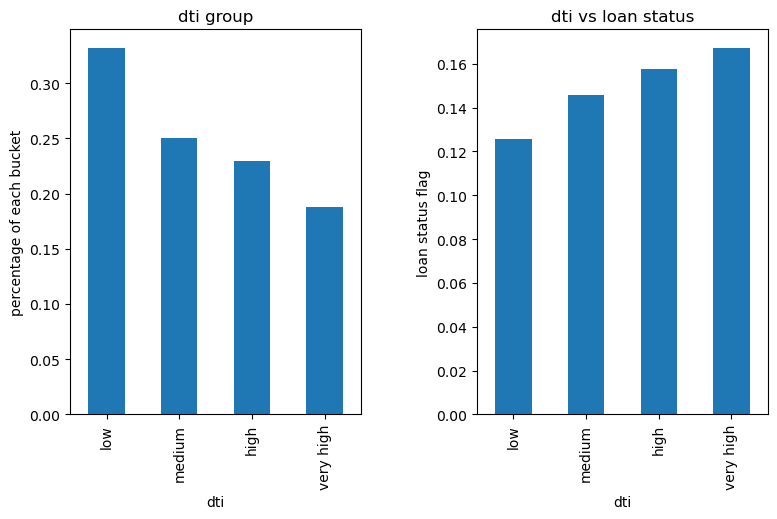

In [114]:
# plot the percentages of each bucket in dti group and dti group with average values of loan_stat_flag in each bucket.
#plot in subplots.

plt.figure(figsize=[9,5])
plt.subplots_adjust(wspace=.4)

#subplot 1
plt.subplot(1,2,1)

loan_data.dti_grp.value_counts(normalize=True).plot.bar()
plt.title('dti group')
plt.xlabel('dti')
plt.ylabel('percentage of each bucket')


#subplot 2
plt.subplot(1,2,2)

loan_data.groupby('dti_grp').loan_stat_flag.mean().plot.bar()
plt.title('dti vs loan status')
plt.xlabel('dti')
plt.ylabel('loan status flag')

plt.show()

## 4.3 Multivariate analysis

#### grade vs loan amount vs loan status

In [115]:
#create pivot table of grade vs loan_amnt_group vs loan_stat_flag
res1 = pd.pivot_table(data=loan_data, index='grade', columns='loan_amnt_group', values='loan_stat_flag') 
res1

loan_amnt_group,<5k,5k-10k,10k-15k,15k-20k,20k-25k,25k+
grade,,,,,,
A,0.072440,0.057136,0.054268,0.042017,0.050847,0.033333
B,0.127066,0.123036,0.111526,0.122567,0.124183,0.137124
C,0.175894,0.162162,0.163731,0.191423,0.180036,0.198238
D,0.230097,0.210593,0.207721,0.243759,0.208661,0.251185
E,0.279330,0.253968,0.255278,0.261044,0.293478,0.284900
F,0.238095,0.306667,0.282609,0.314607,0.394231,0.366279
G,0.500000,0.379310,0.446809,0.388889,0.229167,0.309091


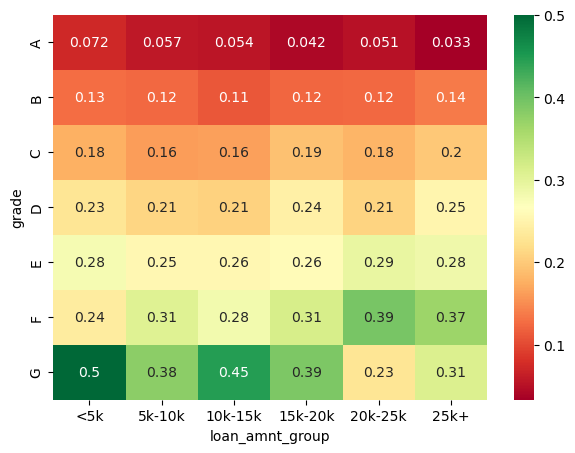

In [116]:
#heatmap of grade vs loan_amnt_group vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res1, annot=True, cmap='RdYlGn')
plt.show()

#### annual income vs loan amount vs loan status

In [117]:
#create pivot table of ann_inc_group vs loan_amnt_group vs loan_stat_flag
res2 = pd.pivot_table(data=loan_data, index='ann_inc_group', columns='loan_amnt_group', values='loan_stat_flag') 
res2

loan_amnt_group,<5k,5k-10k,10k-15k,15k-20k,20k-25k,25k+
ann_inc_group,,,,,,
<10k,0.210526,0.000000,NaN,NaN,NaN,NaN
10k-30k,0.172107,0.181926,0.257062,0.285714,0.400000,NaN
30k-50k,0.149801,0.143749,0.175829,0.221976,0.332090,0.300000
50k-70k,0.124008,0.120059,0.131987,0.212050,0.222576,0.318725
70k+,0.085500,0.092613,0.098700,0.125940,0.160807,0.202773


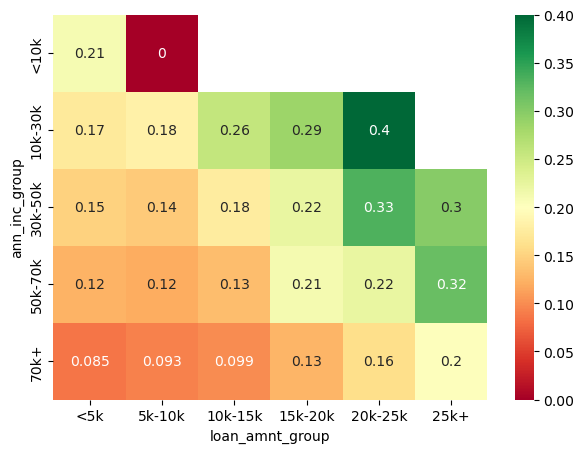

In [118]:
#heatmap of ann_inc_group vs loan_amnt_group vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res2, annot=True, cmap='RdYlGn')
plt.show()

#### annual income vs interest rate vs loan status

In [119]:
#create pivot table of ann_inc_group vs int_rate_group vs loan_stat_flag
res3 = pd.pivot_table(data=loan_data, index='ann_inc_group', columns='int_rate_group', values='loan_stat_flag') 
res3

int_rate_group,low,medium,high,very high
ann_inc_group,,,,
<10k,0.175000,0.234043,0.181818,NaN
10k-30k,0.110664,0.195341,0.295292,0.379310
30k-50k,0.083238,0.172071,0.267914,0.504000
50k-70k,0.059987,0.148273,0.270227,0.424419
70k+,0.042756,0.109963,0.208961,0.335586


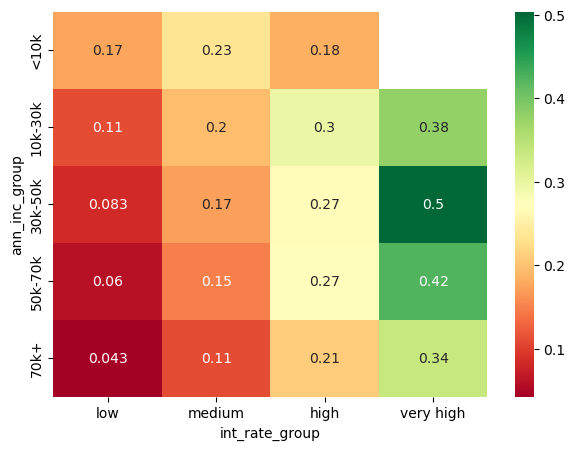

In [120]:
#heatmap of ann_inc_group vs int_rate_group vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res3, annot=True, cmap='RdYlGn')
plt.show()

#### loan amount vs interest rate vs loan status

In [121]:
#create pivot table of loan_amnt_group vs int_rate_group vs loan_stat_flag
res4 = pd.pivot_table(data=loan_data, index='loan_amnt_group', columns='int_rate_group', values='loan_stat_flag') 
res4

int_rate_group,low,medium,high,very high
loan_amnt_group,,,,
<5k,0.080896,0.151715,0.257166,0.318182
5k-10k,0.063568,0.147642,0.233442,0.378378
10k-15k,0.061786,0.136687,0.230370,0.446281
15k-20k,0.049505,0.153880,0.265271,0.428571
20k-25k,0.077181,0.153068,0.265074,0.335227
25k+,0.032468,0.168443,0.264657,0.376744


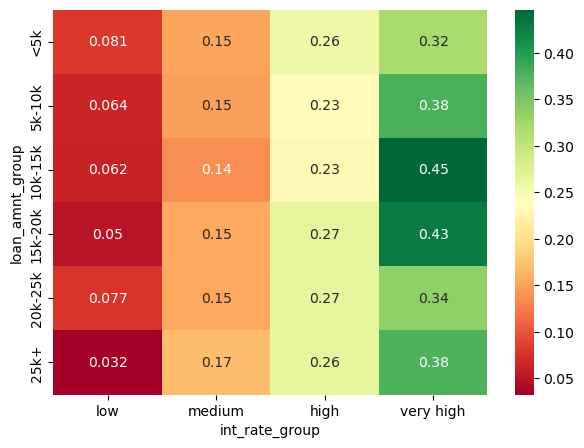

In [122]:
#heatmap of ann_inc_group vs int_rate_group vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res4, annot=True, cmap='RdYlGn')
plt.show()

#### annual income vs installment vs loan status

In [123]:
#pivot table of ann_inc_group vs installment_grp vs loan_stat_flag
res5 = pd.pivot_table(data=loan_data, index='ann_inc_group', columns='installment_grp', values='loan_stat_flag') 
res5

installment_grp,very low,low,medium,high,very high
ann_inc_group,,,,,
<10k,0.204301,0.200000,NaN,NaN,NaN
10k-30k,0.180597,0.164021,0.209895,0.258883,0.253731
30k-50k,0.154107,0.145794,0.169136,0.186998,0.193786
50k-70k,0.124393,0.133022,0.125712,0.166065,0.189972
70k+,0.094841,0.087427,0.102894,0.112159,0.144893


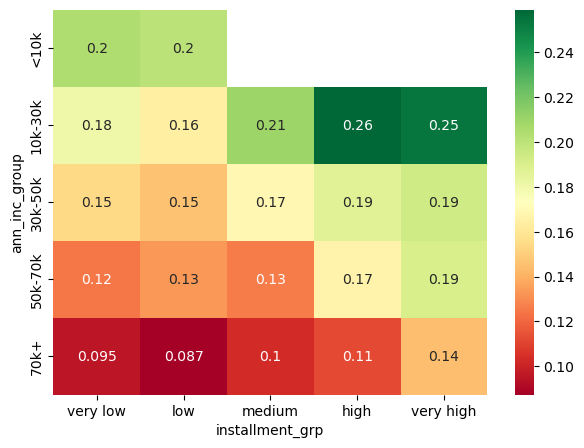

In [124]:
#heatmap of ann_inc_group vs installment_grp vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res5, annot=True, cmap='RdYlGn')
plt.show()

#### loan amount vs installment vs loan status

In [125]:
#pivot table of loan_amnt_group vs installment_grp vs loan_stat_flag
res6 = pd.pivot_table(data=loan_data, index='loan_amnt_group', columns='installment_grp', values='loan_stat_flag') 
res6

installment_grp,very low,low,medium,high,very high
loan_amnt_group,,,,,
<5k,0.139253,0.137076,NaN,NaN,NaN
5k-10k,0.230476,0.126573,0.116907,0.222798,NaN
10k-15k,0.000000,0.164430,0.190548,0.116966,0.115664
15k-20k,0.142857,0.166667,0.179310,0.248984,0.147157
20k-25k,0.000000,0.200000,0.202381,0.255000,0.185928
25k+,NaN,NaN,1.000000,0.285714,0.223329


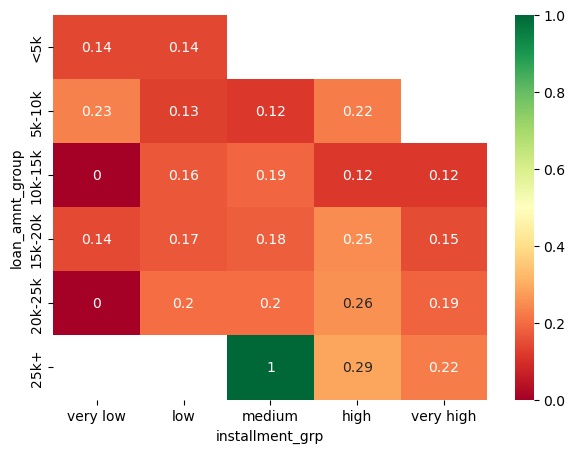

In [126]:
#heatmap of loan_amnt_group vs installment_grp vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res6, annot=True, cmap='RdYlGn')
plt.show()

#### annual income vs debt to income ratio vs loan status

In [127]:
#pivot table of ann_inc_group vs dti_grp vs loan_stat_flag
res7 = pd.pivot_table(data=loan_data, index='ann_inc_group', columns='dti_grp', values='loan_stat_flag') 
res7

dti_grp,low,medium,high,very high
ann_inc_group,,,,
<10k,0.150000,0.333333,0.227273,0.230769
10k-30k,0.171775,0.197154,0.186316,0.180804
30k-50k,0.144644,0.166538,0.169333,0.179365
50k-70k,0.128340,0.140663,0.159390,0.171429
70k+,0.098478,0.118720,0.135534,0.140276


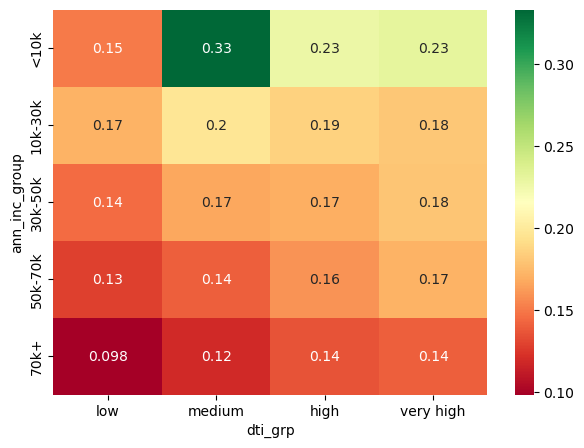

In [128]:
#heatmap of ann_inc_group vs dti_grp vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res7, annot=True, cmap='RdYlGn')
plt.show()

#### loan amount vs debt to income ratio vs loan status

In [129]:
#pivot table of loan_amnt_group vs dti_grp vs loan_stat_flag
res8 = pd.pivot_table(data=loan_data, index='loan_amnt_group', columns='dti_grp', values='loan_stat_flag') 
res8

dti_grp,low,medium,high,very high
loan_amnt_group,,,,
<5k,0.121678,0.136905,0.152482,0.157579
5k-10k,0.109083,0.133439,0.136573,0.148100
10k-15k,0.128294,0.133465,0.141550,0.151329
15k-20k,0.127493,0.171769,0.190344,0.209626
20k-25k,0.196643,0.177632,0.187060,0.208729
25k+,0.169300,0.225904,0.274194,0.247387


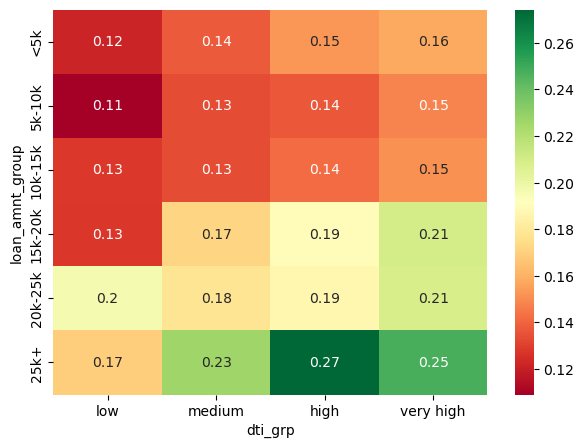

In [130]:
#heatmap of loan_amnt_group vs dti_grp vs loan_stat_flag
plt.figure(figsize=[7,5])
sns.heatmap(res8, annot=True, cmap='RdYlGn')
plt.show()

#### purpose vs loan amount vs loan status

In [131]:
#create pivot table of purpose vs loan_amnt_group vs loan_stat_flag
result = pd.pivot_table(data=loan_data, index='purpose', columns='loan_amnt_group', values='loan_stat_flag') 
result

loan_amnt_group,<5k,5k-10k,10k-15k,15k-20k,20k-25k,25k+
purpose,,,,,,
car,0.101979,0.096367,0.146853,0.148936,0.235294,0.000000
credit_card,0.085421,0.097120,0.103821,0.133758,0.160714,0.149351
debt_consolidation,0.151952,0.133000,0.138273,0.178093,0.184484,0.237126
educational,0.137500,0.201835,0.181818,0.200000,0.375000,NaN
home_improvement,0.110381,0.117647,0.118812,0.120567,0.168224,0.130435
house,0.166667,0.173554,0.158537,0.090909,0.105263,0.259259
major_purchase,0.093855,0.094937,0.111111,0.151515,0.200000,0.090909
medical,0.150350,0.144144,0.180851,0.204545,0.068966,0.500000
moving,0.175227,0.155280,0.071429,0.117647,0.150000,0.200000


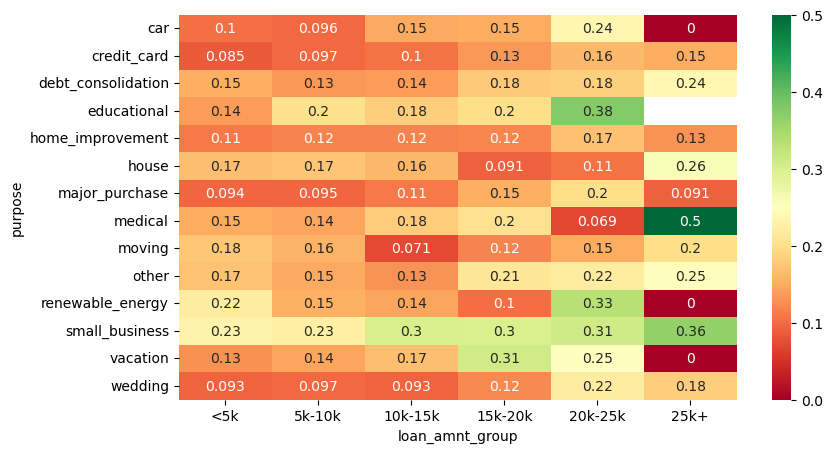

In [132]:
#heatmap of purpose vs loan_amnt_group vs loan_stat_flag
plt.figure(figsize=[9,5])
sns.heatmap(result, annot=True, cmap='RdYlGn')
plt.show()

#### purpose vs annual income vs loan status

In [133]:
#create pivot table of purpose vs annual_inc vs loan_stat_flag
result1 = pd.pivot_table(data=loan_data, index='purpose', columns='ann_inc_group', values='loan_stat_flag') 
result1

ann_inc_group,<10k,10k-30k,30k-50k,50k-70k,70k+
purpose,,,,,
car,0.100000,0.131579,0.125858,0.097765,0.083691
credit_card,0.125000,0.128898,0.133777,0.099452,0.089623
debt_consolidation,0.242424,0.186559,0.169022,0.158557,0.124692
educational,0.076923,0.218750,0.156627,0.155172,0.160000
home_improvement,NaN,0.181347,0.142609,0.142202,0.094288
house,NaN,0.228571,0.175258,0.137931,0.148649
major_purchase,0.000000,0.166667,0.117363,0.099804,0.060921
medical,0.000000,0.197674,0.152778,0.163399,0.138393
moving,0.600000,0.228070,0.180328,0.127119,0.096154


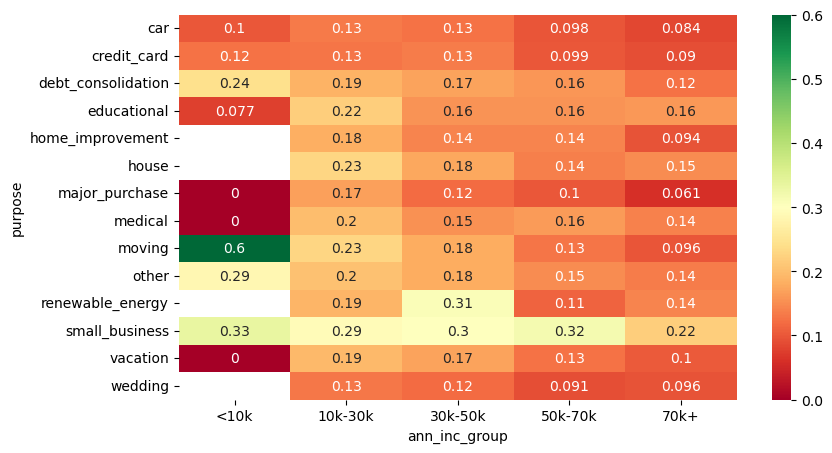

In [134]:
#heatmap of purpose vs ann_inc_group vs loan_stat_flag
plt.figure(figsize=[9,5])
sns.heatmap(result1, annot=True, cmap='RdYlGn')
plt.show()